## Support vector machine
- Support Vedtor Machine (SVM) is a supervised machine learning algorithm used for classification and regression that finds the optimal hyperplane which seperates data points of different classes with the maximum margin line.

### Types of Support Vector Machine":
- Based on the nature of the decision boundary, Support Vector Machines (SVM) can be divided into two main parts:

#### 1.Linear SVM:
- Linear SVMs use a linear decision boundary to separate the data points of different classes. When the data can be precisely linearly separated, linear SVMs are very suitable. This means that a single straight line (in 2D) or a hyperplane (in higher dimensions) can entirely divide the data points into their respective classes. A hyperplane that maximizes the margin between the classes in the decision boundary.

#### 2.Non-Linear SVM:

- Non-Linear SVM can be used to classify data when it cannot be separated into two classes by a straight line (in the case of 2D). By using kernel functions, nonlinear SVMs can handle nonlinearly separable data. The original input data is transformed by these kernel functions into a higher-dimensional feature space where the data points can be linearly separated. A linear SVM is used to locate a nonlinear decision boundary in this modified space.


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as  plt

In [8]:
## Creating Dataset
data = {
    "Study_Hours" : [2,3,5,6,7],
    "Attendence" : [60,65,75,80,85],
    "Result" : ["Fail", "Fail", "Pass", "Pass", "Pass"]
}

df = pd.DataFrame(data)
df

,Study_Hours,Attendence,Result
0,2,60,Fail
1,3,65,Fail
2,5,75,Pass
3,6,80,Pass
4,7,85,Pass


In [10]:
x = df[[ "Study_Hours", "Attendence"]]
y = df[  "Result"]

In [15]:
model = SVC(kernel = "linear")
model.fit(x,y)

SVC(kernel='linear')

In [18]:
w = model.coef_[0]
b = model.intercept_[0]
print(w)
print(b)

[0.03846154 0.19230769]
-13.615384615384613


In [27]:
new_student = pd.DataFrame({
     "Study_Hours" : [4],
    "Attendence" : [70]
})

prediction = model.predict(new_student)

if prediction[0] == "Pass":
    print("prediction : Pass")
else:
    print("Prediction : Fail")

prediction : Pass


In [32]:
x_vals = np.linspace(x["Study_Hours"].min()-1, x["Study_Hours"].max()+1, 100)

y_vals = -(w[0] * x_vals + b) / w[1]

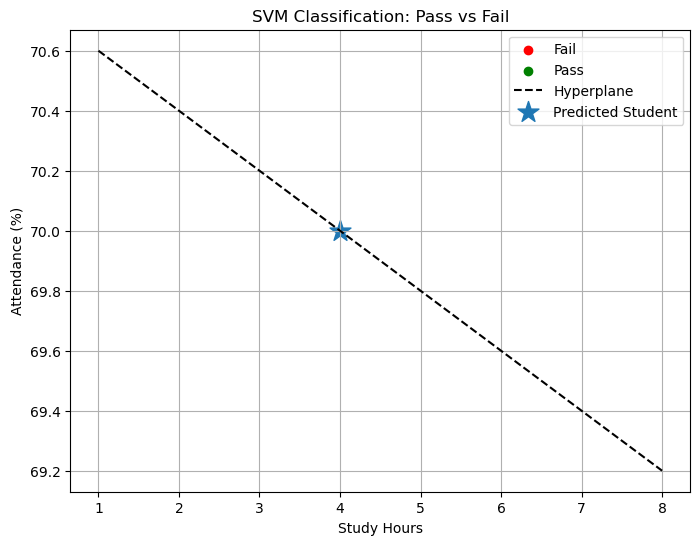

In [31]:
plt.figure(figsize=(8, 6))

# Separate data
fail = df[df.iloc[:, 2] == 0]   # Result column
pass_ = df[df.iloc[:, 2] == 1]

# Fail points
plt.scatter(
    fail.iloc[:, 0],   # Study Hours
    fail.iloc[:, 1],   # Attendance
    color="red",
    label="Fail"
)

# Pass points
plt.scatter(
    pass_.iloc[:, 0],
    pass_.iloc[:, 1],
    color="green",
    label="Pass"
)

# Hyperplane
plt.plot(x_vals, y_vals, "k--", label="Hyperplane")

# Predicted point (NUMPY ARRAY)
plt.scatter(
    new_student.iloc[0, 0],
    new_student.iloc[0, 1],
    marker="*",
    s=250,
    label="Predicted Student"
)

plt.xlabel("Study Hours")
plt.ylabel("Attendance (%)")
plt.title("SVM Classification: Pass vs Fail")
plt.legend()
plt.grid(True)
plt.show()